In [4]:
# downloading the website directly from kaggle.
# it installs it on my computer
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [21]:
files = api.dataset_download_files("alxmamaev/flowers-recognition")
# beware of whether you are downloading from a competition or from a dataset. separate fct's
#api.competition_download_files

In [15]:
import kaggle
#competitions = api.competitions_list(search='cat',category="playground")
competitions = api.competitions_list(search='flowers')
# competitions is a list of competition objects.
# iterate though each item to access individual competition
for comp in competitions:
    print(comp.ref,comp.reward,comp.userRank,sep=',')

flower-classification-with-tpus,Prizes,None


In [18]:
datasets=api.dataset_list(search='flowers')
 
# datasets is a collection of dataset
for dat in  datasets:
     print(dat.ref,dat.viewCount,dat.voteCount,sep=',')

alxmamaev/flowers-recognition,185661,896
cdeotte/oxford-flowers-tfrecords,1108,37
mgornergoogle/five-flowers,1806,13
saidakbarp/17-category-flowers,5323,14
msheriey/104-flowers-garden-of-eden,2077,25
arshid/iris-flower-dataset,95217,214
spaics/hackathon-blossom-flower-classification,5202,21
ianmoone0617/flower-goggle-tpu-classification,1606,10
olgabelitskaya/flower-color-images,30882,116
lenine/flower-102diffspecies-dataset,2574,9
allenjie/flowers17,485,2
aksha05/flower-image-dataset,596,4
gverzea/edible-wild-plants,12228,55
apollo2506/flowers-recognition-dataset,38,2
msheriey/104-flowers-submissions,216,4
vikrishnan/iris-dataset,8218,20
calebeverett/flowers-tpu-openimage-tfrecords,204,4
calebeverett/flowers-tta,140,1
alimodd/flower-shop-dataset,1815,6
rishitchs/final-flowers-course-project-dataset,174,4


In [ ]:
%%capture # should be the first line in the cell, nothing can come before it. not even comments
# supresses the output of this cell

!unzip zippo.zip
# https://technowhisp.com/kaggle-api-python-documentation/
# how to use the kaggle's python api

In [97]:
%%capture # supresses the output of this cell
!unzip flowers-recognition.zip

UsageError: unrecognized arguments: supresses the output of this cell


In [2]:
import os

train_path = os.path.abspath("./flowers/Training")
img_width, img_height = 150, 150 # i tested a bunch of different sizes

In [3]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # conv layer 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # conv layer 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # conv layer 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), # changed 128 to 64 here. maybe gon help with
    # undergitting
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    # conv layer 4
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Flatten(),
    # dense layer 1
    tf.keras.layers.Dense(512, activation='relu'), # 512 - 256 - 512
    tf.keras.layers.BatchNormalization(),
    # why do we actually add the fully-connected layer before the output?
    # so we can process all the data linearly? we essentially condensed the whole image
    # into a really small image using the conv and pooling layers.
    # so to make an actual prediction, we need to "process" the data in that image.
    # which we haven't done. we just made the image less sparse
    tf.keras.layers.Dropout(0.2),
    
    # dense layer 2
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    # prediction layer
    tf.keras.layers.Dense(5, activation='softmax') # 6 classes
])

KeyboardInterrupt: 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [175]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(1./255, # normalize the data
                                   # but how do i know that 255 is the max value? what if it's smth else?
                                   # or is it always 255?
                                   validation_split = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest'
                                  )

In [176]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images
        batch_size=50, # increased the batch size from 16 to 50
        target_size = (img_width, img_height),
        class_mode='categorical',
        subset = "training")

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = train_datagen.flow_from_directory(
        train_path,
        batch_size=50,
        target_size = (img_width, img_height),
        class_mode='categorical',
        subset = "validation")

Found 3462 images belonging to 5 classes.
Found 861 images belonging to 5 classes.


In [ ]:
%%capture
history = model.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=20,
      validation_data=validation_generator,
      shuffle = True,
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)

In [ ]:
#model.save("flowers.h5")
from tensorflow.keras.models import load_model
model = load_model("flowers.h5")

In [82]:
#%cd flowers/Training
!cd /Users/elenabukreeva/Desktop/jupyter
!pwd
!find . -type f | cut -d"/" -f2 | uniq -c
#!ls  /Users/elenabukreeva/Desktop/jupyter/flowers/Training/*| xargs -n1 ls | wc -l

/Users/elenabukreeva/Desktop/jupyter/flowers/Training
   1 .DS_Store
 769 daisy
 784 rose
 984 tulip
1055 dandelion
 734 sunflower


In [93]:
history1 = model.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=120,
      initial_epoch = 100,
      validation_data=validation_generator,
      shuffle = True,
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)

/Users/elenabukreeva/Library/Python/3.7/lib/python/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 101/120
50/50 - 51s - loss: 0.2884 - accuracy: 0.8976 - val_loss: 0.8604 - val_accuracy: 0.7360
Epoch 102/120
50/50 - 53s - loss: 0.2565 - accuracy: 0.9052 - val_loss: 0.7753 - val_accuracy: 0.7840
Epoch 103/120
50/50 - 61s - loss: 0.2497 - accuracy: 0.9100 - val_loss: 0.8058 - val_accuracy: 0.7560
Epoch 104/120
50/50 - 78s - loss: 0.2273 - accuracy: 0.9124 - val_loss: 0.6584 - val_accuracy: 0.7780
Epoch 105/120
50/50 - 69s - loss: 0.2357 - accuracy: 0.9143 - val_loss: 1.0760 - val_accuracy: 0.7100
Epoch 106/120
50/50 - 61s - loss: 0.2590 - accuracy: 0.9013 - val_loss: 0.6585 - val_accuracy: 0.7840
Epoch 107/120
50/50 - 63s - loss: 0.2249 - accuracy: 0.9124 - val_loss: 0.8951 - val_accuracy: 0.7460
Epoch 108/120
50/50 - 64s - loss: 0.2533 - accuracy: 0.9100 - val_loss: 0.6871 - val_accuracy: 0.7760
Epoch 109/120
50/50 - 62s - loss: 0.2100 - accuracy: 0.9257 - val_loss: 0.7333 - val_accuracy: 0.7740
Epoch 110/120
50/50 - 61s - loss: 0.2450 - accuracy: 0.9127 - val_loss: 0.7684 - v

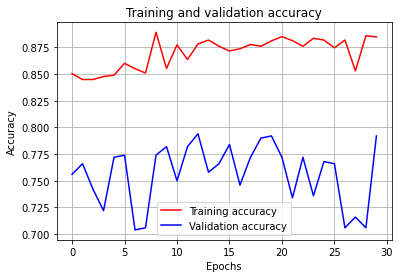

In [92]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid(axis='both')

plt.show() 

In [ ]:
# https://www.kaggle.com/hammaadali/short-custom-cnn-flowers-recognition-model

In [42]:
WEIGHTS_PATH = ('https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [172]:
from tensorflow.keras import applications
img_width, img_height = 224, 224 # resnet50 input
inception_base = applications.ResNet50(weights="imagenet",
                                       include_top=False, input_shape = (224, 224, 3))

In [99]:
# use a model out of the box on the set

# do 2 types of transfer learning here

In [155]:
# use these 2 lines of code to combat the certificate issues
# it creates an environment where certificates aren't checked
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


from keras.applications.vgg16 import VGG16
vgg16_model = VGG16("imagenet")

58892288/58889256 [==============================] - 6s 0us/step


In [126]:
import matplotlib.pyplot as plt
from PIL import Image 

from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

img1 = "./flowers/Training/daisy/image1.jpg"
img2 = "./flowers/Training/dandelion/image1.jpg"
img3 = "./flowers/Training/dandelion/image2.jpg"
img4 = "./flowers/Training/rose/image1.jpg"
imgs = [img1, img2, img3, img4]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.ANTIALIAS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        print(preds)
        f.tight_layout()

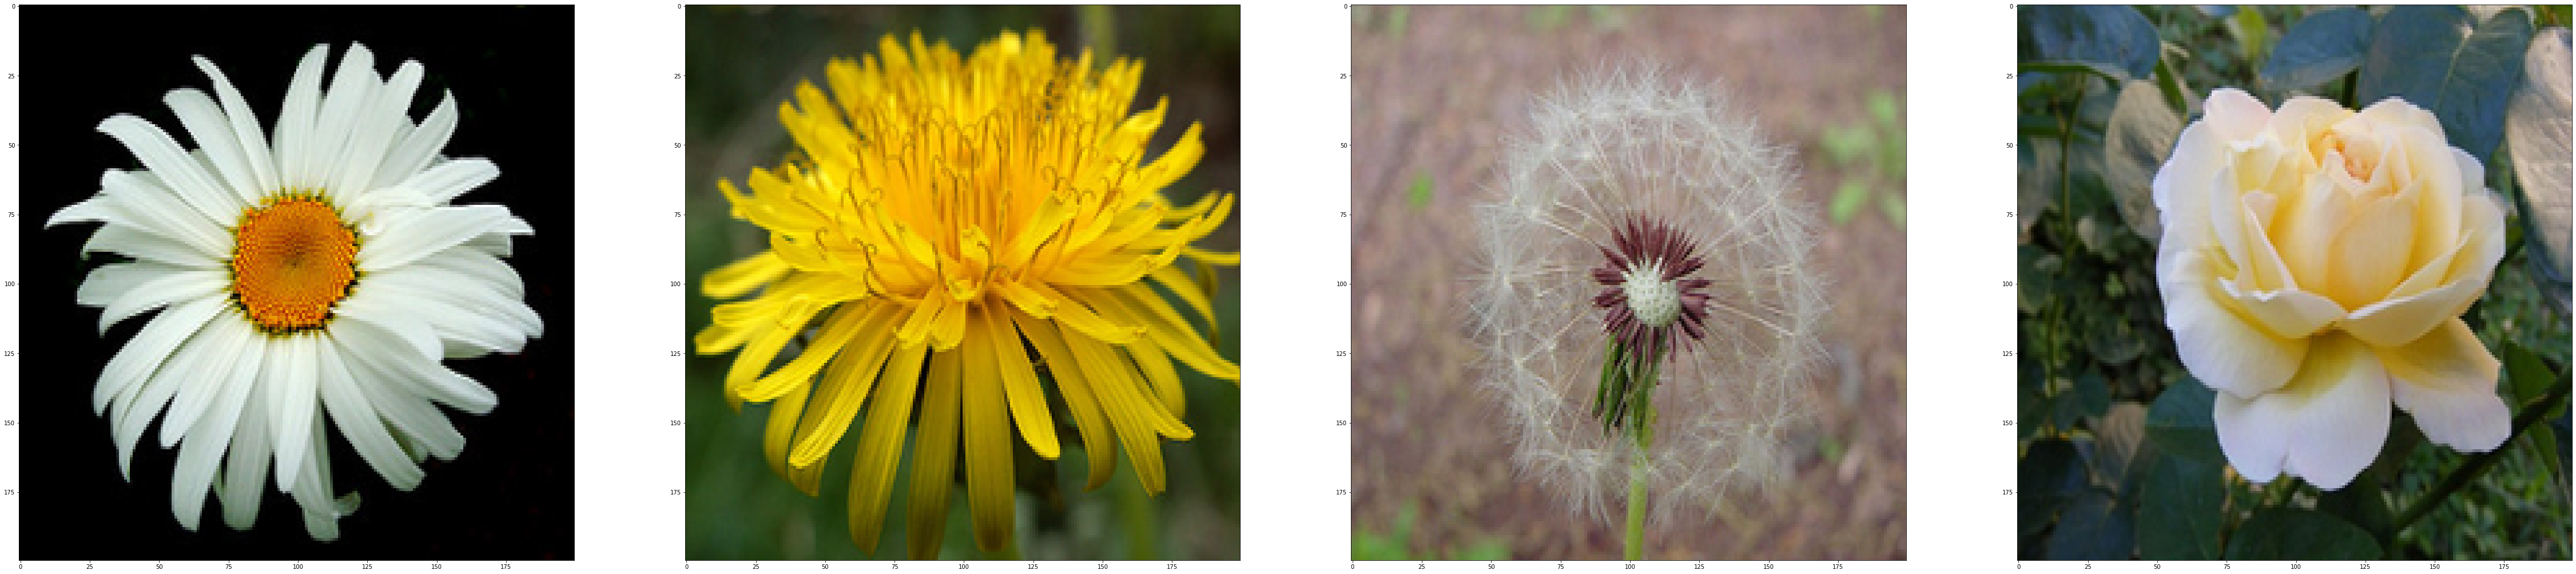

[('n11939491', 'daisy', 0.99966764), ('n01819313', 'sulphur-crested_cockatoo', 0.00011457168), ('n07930864', 'cup', 5.6489458e-05)]
[('n11939491', 'daisy', 0.340036), ('n02281406', 'sulphur_butterfly', 0.22116944), ('n02219486', 'ant', 0.15702464)]
[('n01776313', 'tick', 0.1269929), ('n07730033', 'cardoon', 0.12411211), ('n04275548', 'spider_web', 0.12293482)]
[('n07714571', 'head_cabbage', 0.08556536), ('n07720875', 'bell_pepper', 0.08207931), ('n03991062', 'pot', 0.07845874)]


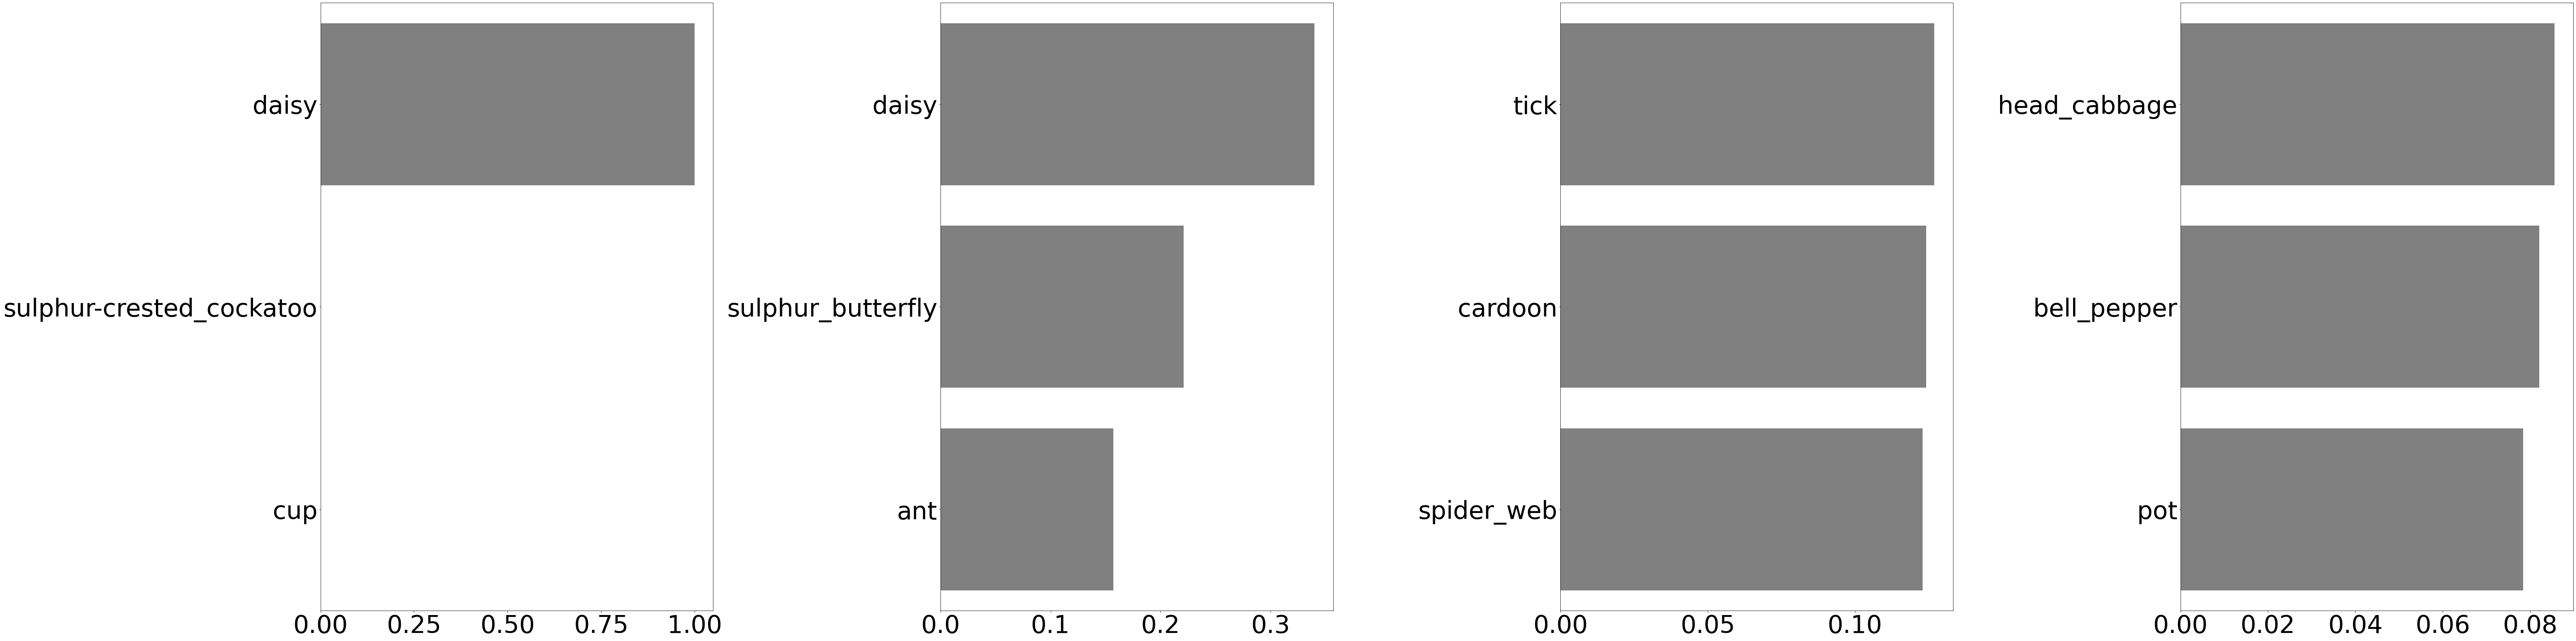

In [127]:
_get_predictions(vgg16_model)

In [160]:
vgg16 = VGG16(include_top = False, weights = "imagenet", input_shape=(img_width, img_height, 3))

In [182]:
model_vgg_base=tf.keras.Sequential()

model_vgg_base.add(vgg16)

model_vgg_base.add(tf.keras.layers.Flatten())

model_vgg_base.add(tf.keras.layers.Dense(256,activation='relu'))
model_vgg_base.add(tf.keras.layers.Dense(5,activation='softmax'))

In [183]:
vgg16.trainable=False # freeze the vgg16's layers

In [189]:
model_vgg_base.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [190]:
history2 = model_vgg_base.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=20,
      validation_data=validation_generator,
      shuffle = True,
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)
# accuracy on the model with specified adam was about 80% on val

Epoch 1/20
50/50 - 161s - loss: 2.0231 - accuracy: 0.6974 - val_loss: 1.5969 - val_accuracy: 0.6820
Epoch 2/20
50/50 - 1429s - loss: 0.9035 - accuracy: 0.7384 - val_loss: 1.0263 - val_accuracy: 0.7420
Epoch 3/20
50/50 - 161s - loss: 0.7328 - accuracy: 0.7640 - val_loss: 0.8457 - val_accuracy: 0.7580
Epoch 4/20
50/50 - 165s - loss: 0.6554 - accuracy: 0.7652 - val_loss: 0.8442 - val_accuracy: 0.7300
Epoch 5/20
50/50 - 162s - loss: 0.5994 - accuracy: 0.8028 - val_loss: 0.6792 - val_accuracy: 0.7840
Epoch 6/20
50/50 - 179s - loss: 0.5516 - accuracy: 0.8050 - val_loss: 0.7758 - val_accuracy: 0.7380
Epoch 7/20
50/50 - 165s - loss: 0.5147 - accuracy: 0.8156 - val_loss: 0.6228 - val_accuracy: 0.7720
Epoch 8/20
50/50 - 175s - loss: 0.4717 - accuracy: 0.8359 - val_loss: 0.7230 - val_accuracy: 0.7700
Epoch 9/20
50/50 - 164s - loss: 0.4654 - accuracy: 0.8290 - val_loss: 0.6776 - val_accuracy: 0.7860
Epoch 10/20
50/50 - 157s - loss: 0.4663 - accuracy: 0.8400 - val_loss: 0.8038 - val_accuracy: 0.766

In [188]:
model_vgg_base.save("vgg_model.h5")

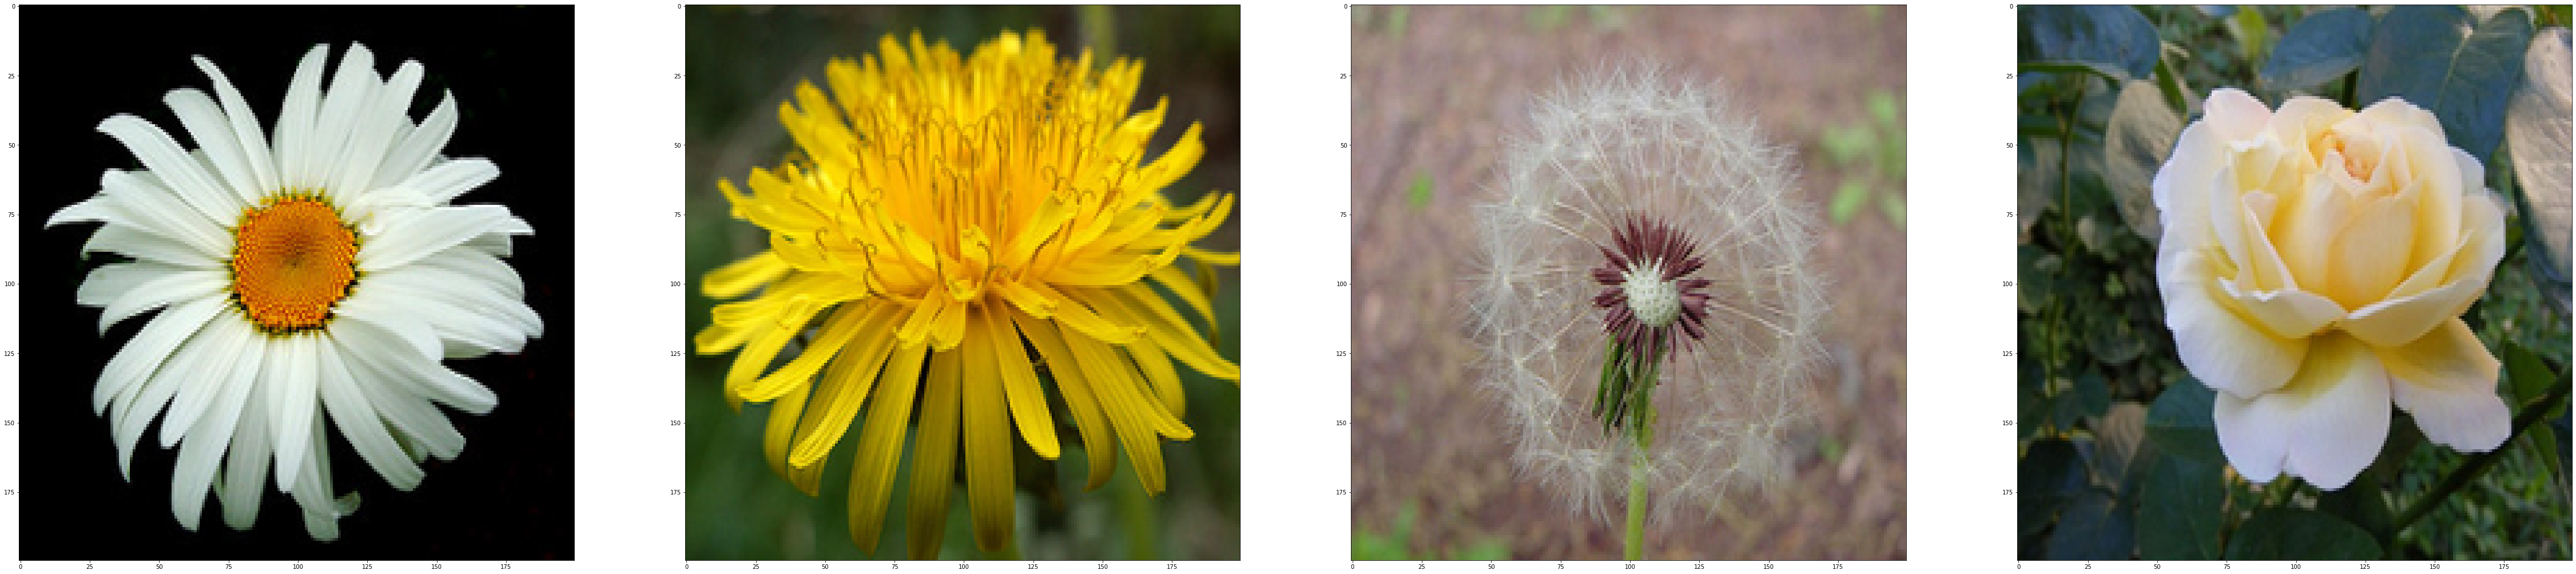

[('n11939491', 'daisy', 0.99997973), ('n01819313', 'sulphur-crested_cockatoo', 2.5774702e-06), ('n02219486', 'ant', 1.8599502e-06)]
[('n11939491', 'daisy', 0.6670705), ('n02206856', 'bee', 0.091698974), ('n11879895', 'rapeseed', 0.0643401)]
[('n07730033', 'cardoon', 0.3916065), ('n01776313', 'tick', 0.24578245), ('n04275548', 'spider_web', 0.2203268)]
[('n03991062', 'pot', 0.18893948), ('n03930313', 'picket_fence', 0.13077892), ('n07715103', 'cauliflower', 0.061559603)]


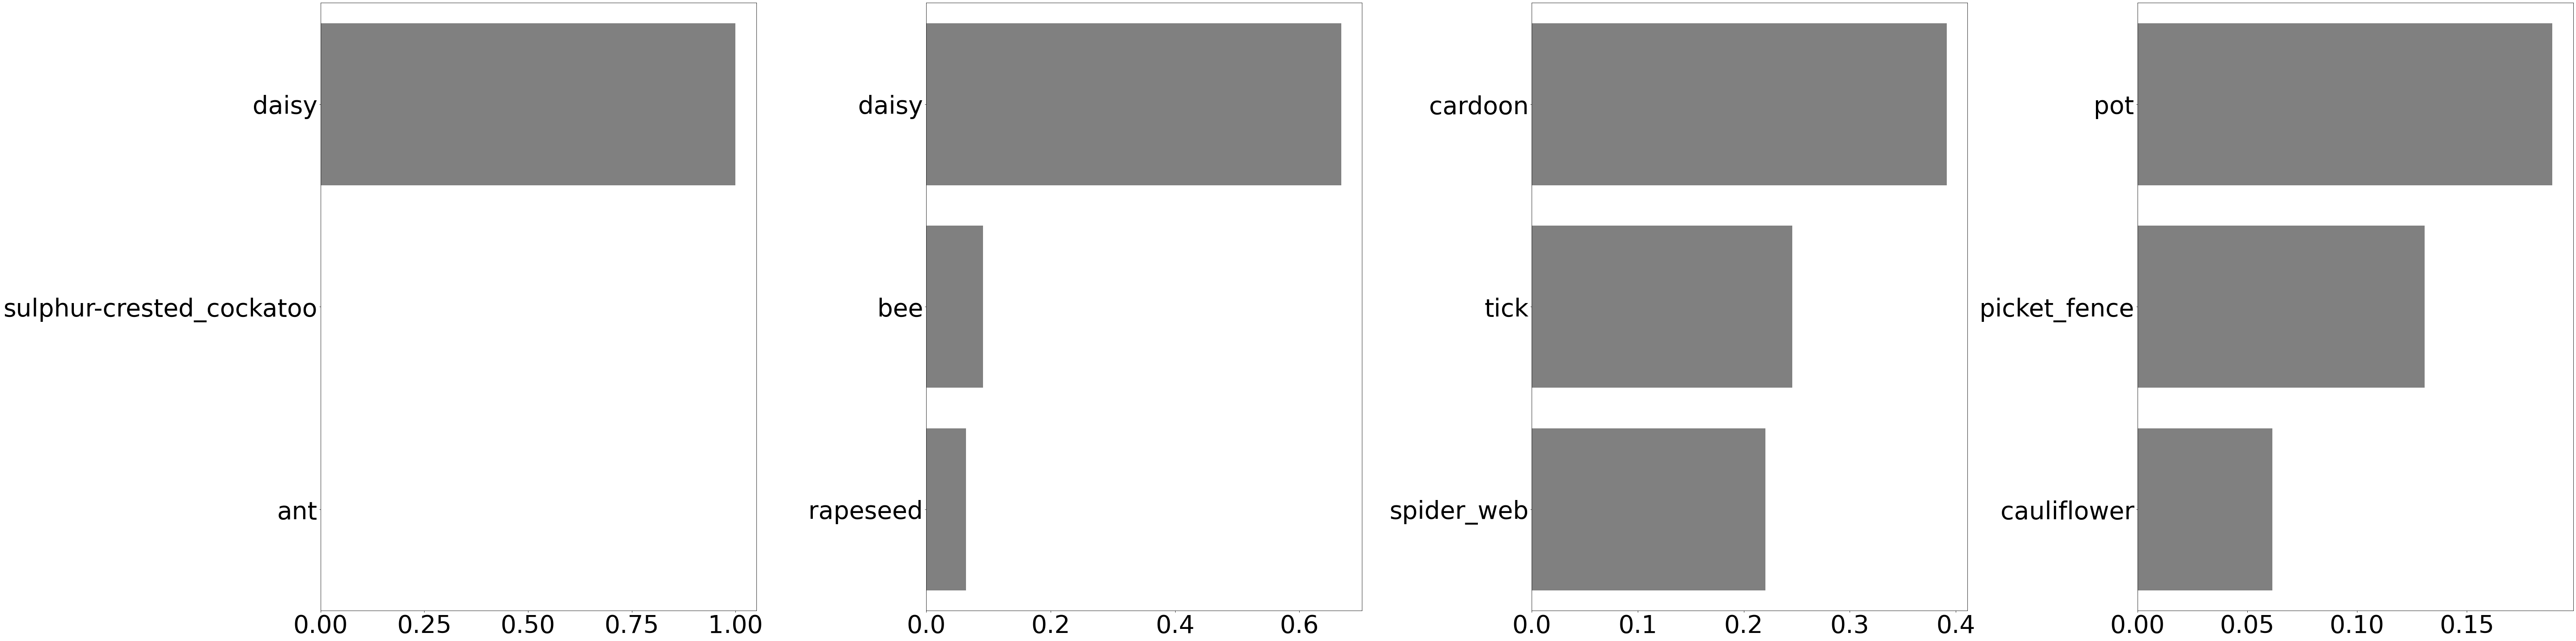

In [129]:
from keras.applications.resnet50 import ResNet50
resnet_model = ResNet50("imagenet")
_get_predictions(resnet_model)

In [137]:
from fastai import *
from fastai.vision import *
import torch
from fastai.vision import ImageDataBunch

ImportError: cannot import name 'ImageDataBunch' from 'fastai.vision' (/Users/elenabukreeva/Library/Python/3.7/lib/python/site-packages/fastai/vision/__init__.py)

In [138]:
data=ImageDataBunch.from_folder(train_path,valid_pct=0.20,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)
data
# i suspect that this code might give me predictions for the whole dataset.
# that would go on the already trained model

NameError: name 'ImageDataBunch' is not defined

In [ ]:
# another way to use transfer learning is to use the end weights of the trained model
# as a part of a machine learning pipeline
# https://www.kaggle.com/shivamb/cnn-architectures-vgg-resnet-inception-tl

# some of the code jacked from https://www.kaggle.com/rajmehra03/a-comprehensive-guide-to-transfer-learning

# image manipulation using opencv:
# flipping colors in an image
# https://www.kaggle.com/soumya9977/deep-dive-in-image-preprocessing-using-opencv

# visualising what the conv net learns
# https://www.kaggle.com/anktplwl91/visualizing-what-your-convnet-learns